# Занятие 11 - Обучение с подкреплением (RL)

## Новые зависимости
Нужно установить gym с помощью pip.
Также потребуется ffmpeg. На OS X используем `brew install ffmpeg`. На большинстве Ubuntu `sudo apt-get install ffmpeg`. На Ubuntu 14.04 используем `sudo apt-get install libav-tools`.

На Windows всё посложнее. Скачать можно по ссылке: https://www.gyan.dev/ffmpeg/builds/ffmpeg-git-essentials.7z, дальше распаковать, поместить на диске в место, где это дальше будет использоваться. То есть в C:\ffmpeg или в C:\Program Files\ffmpeg. Внутри этой папки должен лежать bin, doc и т.д. Далее нужно пойти в настройку переменных окружения, где задать системный путь (Path). Не путать с пользовательским путём. И вписать в одно из полей пути C:\Program Files\ffmpeg\bin (если выбрали второй вариант). Ну или аналогично. Затем перелогиниться в систему или перезагрузиться.

## Обучение с подкреплением как обучение без учителя

### Обучение с учителем
Если у нас есть набор примеров с правильными ответами, то мы используем эту выборку для обучения нашей модели, а после обучения, применяем её к неразмеченным данным. Именно этот подход мы использовали, когда обучали классификатор для MNIST, подавая на вход сети картинки с изображениями рукописных цифр и считая градиент для подстройки весов на основе разницы между известным лэйблом цифры и выходом нейросети.
### Обучение без учителя
В некоторых случаях у нас нет размеченных данных, на которых мы могли бы заранее обучить модель. Но, при решении некоторых задач, можно обойтись без размеченной выборки. Примером такой задачи является задача кластеризации.
### Обучение с подкреплением
В некоторых случаях существующие методы обучения без учителя нам не подходят. В то же время у нас нет возможности создать качественную обучающую выборку. При этом мы можем постфактум оценить действия нашей модели и использовать эту оценку подстроить модель так, чтобы она чаще совершала желательные действия и реже - нежелательные. В литературе такую оценку называют вознаграждением (reward), а обучение строится таким образом, чтобы это модель стремилась максимизировать получаемое вознаграждение.

## Наиболее яркие примеры использования обучения с подкреплением
- В 2013 году DeepMind публикует статью Playing Atari with Deep Reinforcement Learning, где нейросети обучаются игре в старые игры от Atari, используя анализ изображения.
- В 2016 году нейросеть AlphaGO Google DeepMind  обыгрывает одного из сильнейших игроков в Go - Ли Седоля. При обучении AlphaGo использовались партии игры живых людей. Чуть позже будет представлена AlphaGO Zero, обучение которой было полностью построено на игре с самой собой. Новая сеть выиграла у старой со счётом 100:0, причём аппаратные ресурсы сократились с 48 TPU до 4 TPU (Tensor Processing Unit Google).
- В 2017 году нейросеть OpenAI 5 успешно участвует в соревновании по игре Dota.

## Терминология: агент, функция награды, состояние среды

Агент и среда - ключевые понятия в обучении с подкрелением.

**Агент** - программа, принимающая решение о дальнейших действиях на основе информации о состоянии среды.

**Среда** - это мир, в котором агент должен "выживать", т.е. всё, с чем агент может прямо или косвенно взаимодействовать. Среда обладает состоянием (State), агент может влиять на среду, совершая какие-то действия (Actions), переводя среду при этом из одного состояния в другое и получая какое-то вознаграждение. Среда описывается пространством возможных состояний. Конкретное состояние - вектор в этом пространстве.

<img src="agend_and_environment.gif">

В зависимости от конкретной задачи, агент может наблюдать либо полное состояние среды, либо только некоторую его часть. Во втором случае, агенту может потребоваться какое-то внутреннее представление полного состояния, которое будет обновляться по мере получения новых данных.
**Фукнция награды** - вводимая программистом формула вычисления ценности действия на основе финального результата, ожидания этого результата, промежуточных результатов и любых других параметров, которые будут подсказывать путь к наилучшей последовательности действий агента. Это некоторый аналог функции потерь, без которой непонятно чему учиться. Например, в шахматах истинная награда это победа, но взятая фигура соперника тоже ценна и должна увеличивать награду, если мы хотим подсказать агенту, что брать чужие фигуры полезно. Может ли после этого агент получать мат, позарившись на незащищенную фигуру? Да, ровно как и неопытный шахматный игрок. Попытка передать через дополнительные неосновные награды подсказки к получению основной награды называется **reward shaping**.

## Классификация алгоритмов RL
### Model-free / Model-based
Model-free не строит модель окружения или функции награды. Это проще. Model-based алгоритм пытается предсказывать, каким будет следующее состояние окружения или вознаграждение. Это позволяет мыслить на несколько шагов вперёд. Например, совершенно не больно прыгать с крыши. Больно потом, когда разбиваешься о землю. Модель среды и награды позволяет принимать решения не прыгать с крыши, хотя и model-free подход позволяет это понять, хоть и более сложно и грубо.
### Value-based / policy-based
Policy-based  методы оптимизируют напрямую функцию принятия решения агента. Стратегия (policy) обычно представлена распределением вероятности доступных действий. Value-based метод оптимизирует оценку вознаграждения для всех действий и выбирает выбирает то действие, по которому прогнозируется большее значение. Методы, основанные на Policy Gradients лучше работают при большой размерности пространства действий, а Value-based методы, такие, как Deep Q-Learning требуют меньшего количества повторений для сходимости при малой размерности.
### On-Policy / Off-Policy
Off-policy подход позволяет учиться на исторических данных или на записанных заранее действиях человека. On-policy - только на собственных действиях агента. Это довольно важное деление, так как обучение на собственных действиях просто недоступно для многих задач. Плохо ли автомобилю с автопилотом въехать в стену? Надо попробовать, так будет работать on-policy метод. А лучше взять понимание, что это плохо из готовых данных, синтетических, например и усвоить этот опыт. Даже если мы используем симуляцию среды, а не реальную среду, то количество эпизодов симуляции обычно порядка сотен тысяч и их симуляция съедает много времени. Каждый раз проходить переобучение с нуля очень неудобно, а возможность импортировать накопленный опыт симуляции среды сильно экономит ресурсы. Однако off-policy методы можно применить не всегда.
### Deterministic Policy / Stochastic Policy
В зависимости от среды, наша стратегия может быть либо детерминированной - выбираем сразу определённое действие с помощью argmax, либо стохастической, когда мы окончательное решение принимается с помощью генератора случайных чисел на основе распределения вероятности, выданного сетью.

## Типовые ошибки при обучении с подкреплением и их причины

### Низкая скорость обучения (sample efficiency)

Общая проблема всех алгоритмов обучения с подкреплением - низкая скорость обучения. В то время, как человеку может быть достаточно одного повторения, чтобы выучить какое-то действие, агенту RL требуется десятки тысяч повторений даже в простых задачах. В какой-то степени это связано с несовершенством архитектуры, но самый большой вклад даёт тот факт, что человек может использовать накопленный в прошлом опыт из других областей. Игра Montezuma's Revenge - популярный подопытная среда для RL в последнее время. И яркий пример низкой эффективности повторений  у алгоритмов RL по сравнению с человеком. 

Челокек, как правило, быстро понимает, что нужно избегать черепа и забрать ключ, гравитация направлена вниз, а падение с большой высоты опасно. Алгоритму же приходиться обучаться с полного нуля. Если же подменить элементы интерфейса на неочевидные для человека, то его sample-efficency тоже сильно падает (хотя всё-равно лучше, чем RL).

<img src="game_prior.gif" width="700">

А теперь то же самое, но в нечеловекочитаемом виде. Для RL разницы нет, а для человека сразу стало сложнее.

<img src="game_no_prior.gif" width="700">

### Сложное проектирование функции награды
Так же важным фактором являются редкие награды. Часто в ходе одного эпизода алгоритм делает множество различных действий, а награду полуает только в конце. Соответственно, веса сети можно обновить только в конце эпизода и нельзя поощрить или наказать конкретные действия внутри эпизода. В итоге требуется большое количество повторений для достижения оптимальных весов.

Один из способов улучшить эффективность при редких наградах - reward shaping - модификация функции награды так, чтобы явно поощрялись какие-то действия внутри эпизода. Но качественно сконструировать такую функцию тяжело, а ошибки в ней могут приводить к неожиданным эффектам:

<img src="coastrunner.gif" width="700">

В гонке лодок агент получал вознаграждене не только за победу в гонке, но и за сбор игровых бонусов. В итоге он решил, что гонка не очень-то и нужна, достаточно собирать бонусы.

<video controls src="upsidedown_half_cheetah.mp4" width="700"> </video>

У данного агента мы наблюдаем поподание в локальный минимум. Этот агент получает поощрение за набранную скорость. На начальном этапе во время случайного поиска агент обнаружил, что кувыркнуться вперёд даёт хорошее вознаграждение в начале. Постепенно, после нескольких попыток, переворачивание на спину закрепилось, как успешная стратегия. После закрепления такого поведения агент не смог выйти из этого состояния, т.к. оказалось проще научиться двигаться в таком состоянии, чем научиться переворачиваться обратно на ноги.

Похожее поведение можно случано получить, если поощрять агента за то, что его ноги оторваны от земли.
    
<video controls src="failed_reacher.mp4" width="700"> </video>

В данном примере случайная инициализация весов получилась такой, что к вращающейся "конечности" в каждой точке прикладывалась большая сила. В результате конечность начала быстро вращаться. Сложность избавления от такого поведения заключается в том, что для того, чтобы отступить от такой стратегии, нужно путём исследования случайных действий предпринять несколько попыток, когда робот не будет вращаться, чтобы такие действия могли закрепиться. Это возможно, но в данном запуске этого не произошло.
### Невоспроизводимость обучения
Обычно мы всегда начинаем со случайного распределения весов, что не мешает стабильно получать результат обучения. Но с RL это не так. Даже в простой задаче с 3 степенями свободы (state - трёхмерный вектор) и одной степенью воздействия (action - скаляр), обучение с разными зародышами генератора псевдослучайных чисел привело в 30% случаев к фиаско. Заранее понять, что обучение пошло плохо, нельзя или сложно.
<img src="pendulum_results.png" width="700">

## Библиотека OpenAI Gym
В OpenAI создали готовую библиотеку для моделировавния, визуализирования и обучения, что не только удобно для тестов. Одно из хороших преимуществ это качественный абстрактный интерфейс взаимодействия среды и агента, который позволяет делать совместимые с Gym среды и впоследствии интегрироваться в экосистему, легко подменять типы агентов, тестировать, сравнивать.
Среди готовых сред для взаимодействия с ними есть
- игры Atari - полноценные компьютерные игры, типа Арканоида, где вместо человека в компьютер играет агент.
- классические настольные пошаговые игры: шахматы, go.
- физические симуляции, где нужно управлять физическим объектом: маятник, который должен перевернуться и балансировать за счёт раскачивания; тележка, которая должна проехать через холм за счёт раскачивания.
- и т.д.

### Пример окружения Gym
В этом примере загружается готовая среда: машинка должна заехать на горку. Функция награды встроенная. А агент - случайное воздействие. Оно ничему не учится, лишь хаотически выдаёт действия, но это показывает где взять все необходимые данные для обучения.

In [1]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[ 0.02551045  0.0300331   0.02239181 -0.01126388]
[ 0.02611111 -0.16540271  0.02216653  0.28839898]
[0.02280305 0.02939624 0.02793451 0.00278877]
[ 0.02339098  0.22410667  0.02799029 -0.28095124]
[0.02787311 0.02859686 0.02237126 0.02042666]
[ 0.02844505  0.22339096  0.0227798  -0.26511477]
[0.03291287 0.02795141 0.0174775  0.03466518]
[ 0.0334719  -0.16741676  0.0181708   0.3328108 ]
[ 0.03012356 -0.36279256  0.02482702  0.63116805]
[ 0.02286771 -0.55825196  0.03745038  0.93156519]
[ 0.01170267 -0.36365486  0.05608169  0.65088205]
[ 0.00442957 -0.55951123  0.06909933  0.9606841 ]
[-0.00676065 -0.36538266  0.08831301  0.69048518]
[-0.0140683  -0.56161186  0.10212271  1.00961219]
[-0.02530054 -0.36799019  0.12231496  0.75066477]
[-0.03266035 -0.17474839  0.13732825  0.49883866]
[-0.03615531 -0.37151211  0.14730502  0.83145325]
[-0.04358556 -0.56830701  0.16393409  1.16659996]
[-0.0549517  -0.37565298  0.18726609  0.92947436]
[-0.06246475 -0.1834848   0.20585558  0.70099664]
Episode fini

[-0.00312564 -0.03000045 -0.01629596  0.03873857]
[-0.00372565 -0.22488497 -0.01552119  0.32623574]
[-0.00822335 -0.41978254 -0.00899647  0.61398383]
[-0.016619   -0.61477763  0.0032832   0.9038197 ]
[-0.02891456 -0.80994389  0.0213596   1.19753278]
[-0.04511343 -1.00533568  0.04531025  1.49683284]
[-0.06522015 -0.81079285  0.07524691  1.21863476]
[-0.081436   -0.61671731  0.09961961  0.95044694]
[-0.09377035 -0.42306712  0.11862854  0.69065156]
[-0.10223169 -0.22977359  0.13244158  0.43754404]
[-0.10682716 -0.42649713  0.14119246  0.76886922]
[-0.11535711 -0.23357168  0.15656984  0.52373356]
[-0.12002854 -0.43051045  0.16704451  0.86137197]
[-0.12863875 -0.23800888  0.18427195  0.62552192]
[-0.13339893 -0.43515988  0.19678239  0.97011161]
Episode finished after 15 timesteps
[-0.02274657 -0.02279754  0.01189879 -0.01964412]
[-0.02320252  0.17215177  0.01150591 -0.30854922]
[-0.01975948  0.3671079   0.00533492 -0.5975814 ]
[-0.01241733  0.17191171 -0.00661671 -0.30322282]
[-0.00897909 -

[ 0.02297462 -0.01188324  0.00341335 -0.10403019]
[ 0.02273695  0.18318963  0.00133275 -0.39563426]
[ 0.02640075 -0.01195121 -0.00657994 -0.10253144]
[ 0.02616172  0.18326442 -0.00863057 -0.39728304]
[ 0.02982701  0.37850775 -0.01657623 -0.69267447]
[ 0.03739717  0.5738557  -0.03042972 -0.99052933]
[ 0.04887428  0.76937142 -0.05024031 -1.2926121 ]
[ 0.06426171  0.5749228  -0.07609255 -1.01607163]
[ 0.07576016  0.77097235 -0.09641398 -1.33164464]
[ 0.09117961  0.96716889 -0.12304687 -1.6528745 ]
[ 0.11052299  0.77367999 -0.15610436 -1.40092009]
[ 0.12599659  0.58080406 -0.18412277 -1.16083263]
[ 0.13761267  0.7777835  -0.20733942 -1.5051343 ]
Episode finished after 33 timesteps
[0.01525798 0.0216394  0.00869285 0.01469545]
[ 0.01569077  0.21663561  0.00898676 -0.27523215]
[ 0.02002348  0.41162819  0.00348212 -0.56506715]
[ 0.02825605  0.60670112 -0.00781923 -0.85665102]
[ 0.04039007  0.80192873 -0.02495225 -1.15178232]
[ 0.05642864  0.60714107 -0.04798789 -0.86702697]
[ 0.06857146  0.41

In [2]:
import gym
import time
import numpy as np
env = gym.make("MountainCar-v0")
env.render()

Exception ignored in: <bound method Viewer.__del__ of <gym.envs.classic_control.rendering.Viewer object at 0x000001BE3C35C358>>
Traceback (most recent call last):
  File "c:\users\chkn2\appdata\local\programs\python\python36\lib\site-packages\gym\envs\classic_control\rendering.py", line 165, in __del__
    self.close()
  File "c:\users\chkn2\appdata\local\programs\python\python36\lib\site-packages\gym\envs\classic_control\rendering.py", line 83, in close
    self.window.close()
  File "c:\users\chkn2\appdata\local\programs\python\python36\lib\site-packages\pyglet\window\win32\__init__.py", line 299, in close
    super(Win32Window, self).close()
  File "c:\users\chkn2\appdata\local\programs\python\python36\lib\site-packages\pyglet\window\__init__.py", line 823, in close
    app.windows.remove(self)
  File "c:\users\chkn2\appdata\local\programs\python\python36\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: (<weakref at 0x000001BE2CD5A048; to 'Win32Wind

AttributeError: 'MountainCarEnv' object has no attribute 'state'

In [1]:
import gym
import time
import numpy as np
env = gym.make("MountainCar-v0")
MAX_NUM_EPISODES = 5

for episode in range(MAX_NUM_EPISODES):
    done = False
    obs = env.reset()
    total_reward = 0.0 # To keep track of the total reward obtained in each episode
    step = 0
    i = 1
    action = env.action_space.sample()
    while not done:
        i+=1
        env.render()
        time.sleep(0.5)
        
        
        #action = env.action_space.sample()  # Sample random action.
                                            # This will be replaced
                                            # by our agent's action
                                            # when we # start
                                            # developing the agent algorithms
        
        next_state, reward, done, info = \
        env.step(action)  # Send the action to the
                          # environment and receive       
                          # the next_state, reward and
                          # whether done or not
        total_reward += reward
        if (i != 0):
            print(next_state)
        step += 1
        #obs = np.array([0, 0])
    print("\n Episode #{} ended in {} steps. total_reward={} done = {}".format(episode, step+1,
total_reward, done))
env.close()

[-0.45168115 -0.00053916]
[-0.45275551 -0.00107436]
[-0.45435721 -0.0016017 ]
[-0.45647449 -0.00211728]
[-0.45909181 -0.00261732]
[-0.46218992 -0.00309811]
[-0.46574599 -0.00355607]
[-0.46973378 -0.00398779]
[-0.47412381 -0.00439003]
[-0.47888354 -0.00475973]
[-0.48397762 -0.00509409]
[-0.48936817 -0.00539055]
[-0.49501499 -0.00564682]
[-0.50087593 -0.00586094]
[-0.50690716 -0.00603123]
[-0.51306352 -0.00615636]
[-0.51929889 -0.00623537]
[-0.5255665  -0.00626761]
[-0.53181936 -0.00625286]
[-0.53801056 -0.00619121]
[-0.54409372 -0.00608315]
[-0.55002325 -0.00592954]
[-0.55575482 -0.00573156]
[-0.56124558 -0.00549076]
[-0.56645459 -0.00520901]
[-0.57134307 -0.00488848]
[-0.5758747  -0.00453162]
[-0.58001585 -0.00414116]
[-0.5837359  -0.00372005]
[-0.58700736 -0.00327146]
[-0.58980612 -0.00279876]
[-0.59211158 -0.00230546]
[-0.5939068  -0.00179523]
[-0.59517862 -0.00127182]
[-0.59591771 -0.00073908]
[-5.96118644e-01 -2.00938021e-04]
[-5.95779964e-01  3.38680482e-04]
[-0.59490415  0.000875

KeyboardInterrupt: 

In [18]:
env = gym.make('CartPole-v1')
state_size = env.observation_space
print(state_size)

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


# Q-Learning

Q-Learning - это метод основанный на представлении функции полезности Q(s, a) в виде таблицы. Соответственно, такой метод применим только для дискретного набора действий и дискретного количества состояний среды, причём желательно, чтобы число возможных действия и число состояний было небольшим. Ограниченно этот метод можно применить к средам с непрерывным состоянием, если его искусственно дискретизировать.



Если ввести функцию дисконтированного будущего вознаграждения:

\\[ R_t = \sum_{k=0}^{\infty}{\gamma^{k} r_{t+k+1}}, \quad где \quad \gamma \in (0, 1] \\]

то можно определить функцию \\( Q(s, a) \\) как математическое ожидание будущего вознаграждения при выполнении действий \\( a \\) в состоянии \\( s \\),

\\[ Q(S, A) = max_{\pi} \mathbb{E} [G_t | S_t = s, A_t = a, \pi] \\]

SARSA (State, Action, Reward, State, Action) /* on-policy */:

\\[ Q(S_t, A_t) = (1 - \alpha) Q(S_t, A_t) + \alpha [r_{t+1} + \gamma Q(S_{t+1}, A_{t+1})] \\]

\\[ Q(S_t, A_t) = Q(S_t, A_t) + \alpha [r_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)] \\]

\\[ TD_{target} = r + \gamma Q(S_{t+1},A_{t+1})\\]

\\[ TD_{error} = TD_{target} - Q(S_t, A_t) \\]

Q-обучение /* off-policy */:

Уравнение Беллмана:

\\[ Q(S_t,A_t) = Q(S_t, A_t) + \alpha [r_{t+1} +  \gamma \cdot max_{a}{Q(S_{t+1},a}) - Q(S_t, A_t) ] \\]

\\[ TD_{target} = r + \gamma max_{a} Q(S_{t+1},a)\\]

\\[ TD_{error} = TD_{target} - Q(S_t, A_t) \\]


## Эпсилон-жадный алгоритм
Для того, чтобы начать стоить функцию оценки награды для комбинации состояния и действия, нужно какое-то действие выбрать, а пока м ы еще ничего не знаем. Поэтому можно выбрать несколько эпизодов случайное действие. Это будет фазой исследования. Далее можно попробовать выбирать действия, которые ведут в увеличению награды, но тогда выбирать мы будем только из уже известных действий, которые мы исследовали. Получается, что обучение на этом закончится. Лучше если мы будем комбинировать исследование и использование накопленного опыта. Введём эпсилон, как величину от 0 до 1, которая определяет вероятность случаного выбора действия на каждом шаге. Это называется эпсилон-жадным алгоритмом. Выбор значения эпсилон также важен. 0 и 1 явно не подходят, как крайности. 0.5 это тоже странное поведение, когда каждое второе действие делается без царя в голове - случайным образом. А вот значения около 0.1 выглядят разумными.

Для задачи многорукого бандита (набор игровых автоматов, у которых случайным образом есть вероятность выигрыша по нормальному распределению) нужно научиться выигрывать, не зная заранее вероятность выигрыша. При разных эпсилон получились такие графики:
<img src="e-gready_chart.png" width="700">

Обучим с помощью Q-learning предыдущий пример с Mountain-car. При этом гамма `GAMMA` это наш дисконт, экспоненциально спадающий из будущего в прошлое с каждым шагом по времени, а время у нас разбито на шаги в Gym. Состояние в виде координаты нужно сделать дискретным, так как с непрерывными состояниями Q-learning не работает. Для этого введём `NUM_DISCRETE_BINS`, на которые мы разобьём координаты. Для каждого положения нужно понять какое решение лучше. Наконец есть `ALPHA`, который скорость обучения. Это аналог масштабного коэффициента при градиентном спуске. Наконец здесь используется автоподстройка для эпсилон-жадного алгоритма, когда нет фазы изначального исследования среды, а затем переход на фиксированную вероятность случайного действия. Вместо этого сам эпсилон начинает экспоненциально затухать от 1 до некоторого минимального значения (`EPSILON_MIN`) со скоростью `EPSILON_DECAY`.

In [3]:
import numpy as np
import gym

EPSILON_MIN = 0.005
MAX_NUM_EPISODES = 20000
MAX_STEPS_PER_EPISODE = 500
max_num_steps = MAX_NUM_EPISODES * MAX_STEPS_PER_EPISODE
EPSILON_DECAY = 500 * EPSILON_MIN / max_num_steps
ALPHA = 0.05 # learning rate
GAMMA = 0.95 # Discount factor
NUM_DISCRETE_BINS = 30  # Number of bins to Discretize each
                        # observation dim

class QAgent():
    def __init__(self, env):
        self.obs_shape = env.observation_space.shape
        self.obs_high = env.observation_space.high
        self.obs_low = env.observation_space.low
        self.obs_bins = NUM_DISCRETE_BINS
        self.bin_width = (self.obs_high - self.obs_low) \
            / self.obs_bins
        self.action_shape = env.action_space.n
        # Create a table to represent the Q-values
        self.Q = np.zeros((self.obs_bins + 1, self.obs_bins + 1,
                          self.action_shape)) # (31 x 31 x 3)
        self.alpha = ALPHA
        self.gamma = GAMMA
        self.epsilon = 1.0
    
    
    def discretize(self, obs):
        return tuple(((obs - self.obs_low) \
                      / self.bin_width).astype(int))
    
    
    def get_action(self, obs):
        discretized_obs  = self.discretize(obs)
        # Epsilon-Greedy action selection
        if self.epsilon > EPSILON_MIN:
            self.epsilon -= EPSILON_DECAY
        if np.random.random() > self.epsilon:
            return np.argmax(self.Q[discretized_obs])
        else:  # choose a random action
            return np.random.choice([a for a in range(self.action_shape)])
        
    
    def learn(self, obs, action, reward, next_obs):
        discretized_obs = self.discretize(obs)
        discretized_next_obs = self.discretize(next_obs)
        td_target = reward + self.gamma * np.max(self.Q[discretized_next_obs])
        td_error = td_target - self.Q[discretized_obs][action]
        self.Q[discretized_obs][action] +=  self.alpha * td_error


def train_Q(agent, env):
    best_reward = -float('inf')
    for episode in range(MAX_NUM_EPISODES):
        done = False
        obs = env.reset()
        total_reward = 0.0
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, done, info = env.step(action)
            agent.learn(obs, action, reward, next_obs)
            obs = next_obs
            total_reward += reward
        best_reward = max(best_reward, total_reward)
        print("\rEpisode#:{} reward:{} best_reward:{} eps:{}"
             .format(episode, total_reward, best_reward, agent.epsilon), end="")
        
    # Return the trained policy
    return np.argmax(agent.Q, axis=2)


def test_Q(agent, env, policy):
    done = False
    obs = env.reset()
    total_reward = 0.0
    while not done:
        action = policy[agent.discretize(obs)]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        total_reward += reward
    return total_reward


if __name__ == "__main__":
    env = gym.make('MountainCar-v0')
    agent = QAgent(env)
    learned_policy = train_Q(agent, env)
    # Use the Gym Monitor wrapper to evaluate the agent and record video
    gym_monitor_path = "./output/gym"
    env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
    for _ in range(1000):
        test_Q(agent, env, learned_policy)
    env.close()

Episode#:19999 reward:-183.0 best_reward:-119.0 eps:0.033631999948726646

## Deep Q-Networks

Таблицу, аппроксимирующую нашу функцию качества можно заменить нейросетью, которая будет предсказывать значению Q сразу для всех возможных действий. В этом случае нам нужно определить функцию потерь, от которой мы будем считать градиент.

\\[ L = {TD_{error}}^2 \\]
\\[ L = (r + \gamma max_a Q(S_t, a) - Q(S_t, A_t))^2 \\]

## Experience replay

В большинстве окружений информация, получаемая агентом распределена не независимо. Т.е. последовательные наблюдения агента сильно коррелированы между собой (что понятно из интуитивных соображений, т.к. большинство окружений, в которых применяется RL, предполагают, что все изменения в них последовательны). Корреляция примеров ухудшает сходимость стохастического градиентного спуска. Таким образом нам нужен способ, который позволяет улучшить распределение примеров для обучения (устранить или снизить корреляцию между ними). Обычно используется метод **проигрывания опыта (experience replay)**. Суть этого метода в том, что мы сохраняем некоторое количество примеров (состояние, действия, вознаграждение) в специальном буфере и для обучения выбираем случайные мини-батчи из этого буфера.

Так же **experience replay** позволяет агенту эффективнее использовать свой прошлый опыт.

## Double DQN

Одной из проблем Q-Networks является неустойчивость. Часто разность ожидаемых вознаграждений для различных действий близка и поскольку выбор действия производится с помощью argmax, то выброс в данных может привести к тому, что выбираемое действие изменится. Для того, чтобы повысить стабильность используется техника **Target Q-Network**. Суть в том, что мы замораживаем веса нашей сети на фиксированное число шагов и затем используем её для вычисления функции ошибки и обучения второй сети. Периодически копируем из веса рабочей сети в Target Q-Network.
В следующем примере мы будем делать это каждый эпизод.

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_61 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 75        
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_64 (Dense)             (None, 24)                600       
________________________________

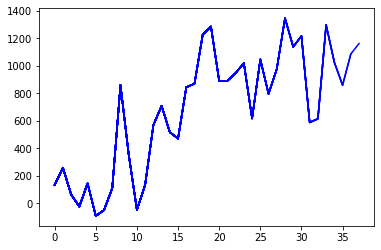

In [12]:
import sys
import gym
import pylab
import random
import numpy as np
from collections import deque
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

EPISODES = 300


# Double DQN Agent for the Cartpole
# it uses Neural Network to approximate q function
# and replay memory & target q network
class DoubleDQNAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # these is hyper parameters for the Double DQN
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 500
        # create replay memory using deque
        self.memory = deque(maxlen=1000)

        # create main model and target model
        self.model = self.build_model()
        self.target_model = self.build_model()

        # initialize target model
        self.update_target_model()
        
    def load_model(self, path):
        self.model.load_weights(path)

    # approximate Q function using Neural Network
    # state is input and Q Value of each action is output of network
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(24, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # after some time interval update the target model to be same with model
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # get action from model using epsilon-greedy policy
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # save sample <s,a,r,s'> to the replay memory
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    # pick samples randomly from replay memory (with batch_size)
    def train_model(self):
        if len(self.memory) < self.train_start:
            return
        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        update_input = np.zeros((batch_size, self.state_size))
        update_target = np.zeros((batch_size, self.state_size))
        action, reward, done = [], [], []

        for i in range(batch_size):
            update_input[i] = mini_batch[i][0]
            action.append(mini_batch[i][1])
            reward.append(mini_batch[i][2])
            update_target[i] = mini_batch[i][3]
            done.append(mini_batch[i][4])
        
        target = self.model.predict(update_input)
        target_next = self.model.predict(update_target)
        target_val = self.target_model.predict(update_target)

        for i in range(self.batch_size):
            # like Q Learning, get maximum Q value at s'
            # But from target model
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                # the key point of Double DQN
                # selection of action is from model
                # update is from target model
                a = np.argmax(target_next[i])
                target[i][action[i]] = reward[i] + self.discount_factor * (
                    target_val[i][a])

        # make minibatch which includes target q value and predicted q value
        # and do the model fit!
        self.model.fit(update_input, target, batch_size=self.batch_size,
                       epochs=1, verbose=0)


if __name__ == "__main__":
    # In case of CartPole-v1, you can play until 500 time step
    env = gym.make('MountainCar-v0')
    # get size of state and action from environment
    
     
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    agent = DoubleDQNAgent(state_size, action_size)
    
    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            # get action for the current state and go one step in environment
            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            f = 500*(next_state[0][0] - state[0][0]) if ((next_state[0][0] - state[0][0]) > 0) else 0
            # if an action make the episode end, then gives penalty of -100
            reward = (reward+f) if not done or score == 499 else -100
            # save the sample <s, a, r, s'> to the replay memory
            agent.append_sample(state, action, reward, next_state, done)
            # every time step do the training
            agent.train_model()
            score += reward
            state = next_state

            if done:
                # every episode update the target model to be same with model
                agent.update_target_model()

                # every episode, plot the play time and remove penalty introduced above
                score = score if score == 500 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./output/cartpole_ddqn.png")
                print("episode:", e, "  score:", score, "  memory length:",
                      len(agent.memory), "  epsilon:", agent.epsilon)

        # if the mean of scores of last 10 episode is bigger than 490
        # stop training
        if np.mean(scores[-min(20, len(scores)):]) > 1000:
            agent.model.save_weights("./output/cartpole_ddqn.h5")
            break

        # save the model each 50 episodes
        if e % 50 == 0:
            agent.model.save_weights("./output/cartpole_ddqn.h5")

Генерация нескольких видеозаписей решения задачи среды обученным агентом. Создаём новый экземпляр класса, загружаем в него сохранённые данные обучения (в данном случае нейронную сеть), убираем эпсилон, чтобы новый опыт не собирался. Тут аналогия с Dropout слоем, он тоже отключается на inference. Включаем монитор для записи и запускаем цикл действий агента.

In [13]:
if __name__ == "__main__":
    try:
        env = gym.make('MountainCar-v0')
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n
        agent = DoubleDQNAgent(state_size, action_size)
        agent.load_model("./output/cartpole_ddqn.h5")
        agent.epsilon = 0

        # Use the Gym Monitor wrapper to evaluate the agent and record video
        gym_monitor_path = "./output/gym"
        # Record every episode, instead of selective
        env = gym.wrappers.Monitor(env, gym_monitor_path, video_callable=lambda episode_id: True, force=True)
        for _ in range(3):
                done = False
                obs = env.reset()
                obs = np.reshape(obs, [1, state_size])
                total_reward = 0.0
                iteration = 0
                while not done:
                    action = agent.get_action(obs)
                    next_obs, reward, done, info = env.step(action)
                    next_obs = np.reshape(next_obs, [1, state_size])
                    obs = next_obs
                    total_reward += reward
                    iteration += 1
                print("Total reward: ", total_reward, "  Iterations: ", iteration)
    finally:
        env.close()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_67 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_68 (Dense)             (None, 3)                 75        
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_70 (Dense)             (None, 24)                600       
________________________________

# Другие улучшения DQN

## Prioritized Experience Replay

Минибатчи из памяти выбираются не с равномерным распределением, а добавляем туда больше примеров, в которых предсказанные значения Q сильнее всего отличаются от корректных. Т.е. примеры с максимальным **TD error** получают максимальный приоритет.

## Dueling networks

Основная идея в том, что мы разделяем нашу сеть на две головы, одна из которых предсказывает абсолютное значение состояния \\( V(S) \\), а вторая - относительное преимущество одний действий над другими \\( A(s, a) = Q(s, a) - V(s) \\). Это преимущество называется advantage. Далее из этих двух значений мы собираем нашу Q-функцию, как \\( Q(s,a) = V(s) + A(a) \\)

## Noisy nets

Т.к. по мере обучения агент будет стремиться выбирать состояния с максимальным Q, среди уже исследованных, это может помешать ему найти более эффективные состояния, в которых его ещё не было. Одним из решений этой проблемы является использование детерминированной и случайной нейросети, распределение параметров которой так же обучается с помощью градиентного спуска.

## Multi-step learning/n-step learning

Основная идея в том, чтобы считать функцию ценности не по двум соседним примерам, а сразу по n. Это позволяет сети лучше запоминать длинные последовательности действий.

## Distributional RL

Детерминированное значение Q заменяется случайным распределением Z с некоторыми параметрами, которые определяются в ходе обучения.

# Rainbow

State of the art в развитии Q-обучения - набор перечисленных выше твиков. На графике ниже сравнение различных алгоритмов по количеству очков, усреднённое по играм Atari в сравнении со средними результатами человека.

<img src="rainbow_dqn.png" width="700">

## Policy Gradients

Мы используем нейросеть, которая получает на вход вектор состояния среды, а на выход сразу выдаёт вектор необходимых действий. Такой подход называется DPG (Deep Policy Gradients) или, в случае детерминированной стратегии, DDPG (Deep Deterministic Policy Gradients). Для подстройки весов в этом случае мы будем использовать градиент:
\\[ - \nabla log P(s, a, \theta) R \\]
где P - предсказание вероятности действий нейросетью, а R - полученное вознаграждение.

Основной минус этого метода - необходимо дожидаться конца эпизода для получения куммулятивного вознаграждения. В отличии от DQN возможна работа с непрерывными действиями, тогда, как DQN может работать только с дискретным набором.

In [ ]:
import sys
import gym
import pylab
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

EPISODES = 1000


# This is Policy Gradient agent for the Cartpole
# In this example, we use DPG algorithm which uses monte-carlo update rule
class DPGAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # These are hyper parameters for the Policy Gradient
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.hidden1, self.hidden2 = 24, 24

        # create model for policy network
        self.model = self.build_model()

        # lists for the states, actions and rewards
        self.states, self.actions, self.rewards = [], [], []
        
    def load_model(self, path):
        self.model.load_weights(path)

    # approximate policy using Neural Network
    # state is input and probability of each action is output of network
    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden1, input_dim=self.state_size, activation='relu', kernel_initializer='glorot_uniform'))
        model.add(Dense(self.hidden2, activation='relu', kernel_initializer='glorot_uniform'))
        model.add(Dense(self.action_size, activation='softmax', kernel_initializer='glorot_uniform'))
        model.summary()
        # Using categorical crossentropy as a loss is a trick to easily
        # implement the policy gradient. Categorical cross entropy is defined
        # H(p, q) = sum(p_i * log(q_i)). For the action taken, a, you set 
        # p_a = advantage. q_a is the output of the policy network, which is
        # the probability of taking the action a, i.e. policy(s, a). 
        # All other p_i are zero, thus we have H(p, q) = A * log(policy(s, a))
        model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=self.learning_rate))
        return model

    # using the output of policy network, pick action stochastically
    def get_action(self, state):
        policy = self.model.predict(state, batch_size=1).flatten()
        return np.random.choice(self.action_size, 1, p=policy)[0]

    # In Policy Gradient, Q function is not available.
    # Instead agent uses sample returns for evaluating policy
    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(0, len(rewards))):
            running_add = running_add * self.discount_factor + rewards[t]
            discounted_rewards[t] = running_add
        return discounted_rewards

    # save <s, a ,r> of each step
    def append_sample(self, state, action, reward):
        self.states.append(state)
        self.rewards.append(reward)
        self.actions.append(action)

    # update policy network every episode
    def train_model(self):
        episode_length = len(self.states)

        discounted_rewards = self.discount_rewards(self.rewards)
        discounted_rewards -= np.mean(discounted_rewards)
        discounted_rewards /= np.std(discounted_rewards)

        update_inputs = np.zeros((episode_length, self.state_size))
        advantages = np.zeros((episode_length, self.action_size))

        for i in range(episode_length):
            update_inputs[i] = self.states[i]
            advantages[i][self.actions[i]] = discounted_rewards[i]

        self.model.fit(update_inputs, advantages, epochs=1, verbose=0)
        self.states, self.actions, self.rewards = [], [], []

if __name__ == "__main__":
    # In case of CartPole-v1, you can play until 500 time step
    env = gym.make('CartPole-v1')
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # make DPG agent
    agent = DPGAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            # get action for the current state and go one step in environment
            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            reward = reward if not done or score == 499 else -100

            # save the sample <s, a, r> to the memory
            agent.append_sample(state, action, reward)

            score += reward
            state = next_state

            if done:
                # every episode, agent learns from sample returns
                agent.train_model()

                # every episode, plot the play time
                score = score if score == 500 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./output/cartpole_dpg.png")
                print("episode:", e, "  score:", score)

        # if the mean of scores of last 10 episode is bigger than 490
        # stop training
        if np.mean(scores[-min(10, len(scores)):]) > 490:
            agent.model.save_weights("./output/cartpole_dpg.h5")
            break

        # save the model each 50 episodes
        if e % 50 == 0:
            agent.model.save_weights("./output/cartpole_dpg.h5")

Генерация нескольких видеозаписей решения задачи среды обученным агентом. Создаём новый экземпляр класса, загружаем в него сохранённые данные обучения (в данном случае нейронную сеть), убираем эпсилон, чтобы новый опыт не собирался. Включаем монитор для записи и запускаем цикл действий агента. Всё, как в методе DDQN.

In [ ]:
if __name__ == "__main__":
    try:
        env = gym.make('CartPole-v1')
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n
        agent = DPGAgent(state_size, action_size)
        agent.load_model("./output/cartpole_dpg.h5")
        agent.epsilon = 0

        # Use the Gym Monitor wrapper to evaluate the agent and record video
        gym_monitor_path = "./output/gym"
        env = gym.wrappers.Monitor(env, gym_monitor_path, video_callable=lambda episode_id: True, force=True)
        for _ in range(3):
                done = False
                obs = env.reset()
                obs = np.reshape(obs, [1, state_size])
                total_reward = 0.0
                while not done:
                    action = agent.get_action(obs)
                    next_obs, reward, done, info = env.step(action)
                    next_obs = np.reshape(next_obs, [1, state_size])
                    obs = next_obs
                    total_reward += reward
    finally:
        env.close()

## Улучшения метода Policy Gradients

Такого большого набора твиков, как для DQN для DPG не наблюдается. Наиболее известны методы: TRPO (Trust Region Policy Optimization) и PPO (Proximal Policy Optimization). В них заложена несколько разная математика, но суть обоих методов в ограничении изменения весов за один прогон для того, чтобы выбросы не портили выученную стратегию.

## Actor-critic и его модификации

Можно взять две сети, одна из которых будет предсказывать действия, а вторая - оценивать, насколько эти действия хороши, т.е. выдавать значение Q. Помимо самих действий ей на вход мы так же подадим состояне.

<img src="actor_critic.png">

Плюс в том, что нам не обязательно дожидаться окончания эпизода для обучения.

### Advantage-Actor-Critic, A2C

Вместо вычисления градиентов от абсолютного значения \\( Q(s, a) \\) мы можем использовать относительное преимущество одний действия над другими \\( A(s, a) = Q(s, a) - V(s) \)). Тогда если \\( A(s, a) > 0 \\), то градиентный спуск будет изменять все веса, повышая вероятность предсказанных действий. Если же \\( A(s, a) < 0 \\), то градиентный спуск будет понижать вероятность таких действий. \\( V(s) \\) при этом показывает, насколько состояние хорошо само по себе: если мы в двух шагах от вершины Эвереста, то это очень хороший state, а если мы летим в пропасть, то state крайне фиговый, чтобы мы в нём не делали (если, конечно, у нас нет с собой парашюта).

При использовании такого подхода функцию Q(s, a) можно заменить прямо на полученное вознаграждение за некоторое действие вознаграждение r. Тогда \\( A(s,a) = r - V(s) \\). При этом получается, что сети Actor и Critic можно объединить в одну с двумя головами, что улучшает переиспользование весов и ускоряет обучение.

<img src="a2c.png" width=700>

### Asynchronous Advantage Actor Critic A3C
У нас есть сервер, собирающий результаты с нескольких Actor'ов и обновляющий веса, когда наберётся батч достаточного размера. 

In [1]:
import sys
import gym
import pylab
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

EPISODES = 1000


# A2C(Advantage Actor-Critic) agent for the Cartpole
class A2CAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size
        self.value_size = 1

        # These are hyper parameters for the Policy Gradient
        self.discount_factor = 0.99
        self.actor_lr = 0.001
        self.critic_lr = 0.005

        # create model for policy network
        self.actor = self.build_actor()
        self.critic = self.build_critic()

        def load_model(self, path_actor, path_critic):
            self.actor.load_weights(path_actor)
            self.critic.load_weights(path_critic)

    # approximate policy and value using Neural Network
    # actor: state is input and probability of each action is output of model
    def build_actor(self):
        actor = Sequential()
        actor.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        actor.add(Dense(self.action_size, activation='softmax',
                        kernel_initializer='he_uniform'))
        actor.summary()
        # See note regarding crossentropy in cartpole_reinforce.py
        actor.compile(loss='categorical_crossentropy',
                      optimizer=Adam(lr=self.actor_lr))
        return actor

    # critic: state is input and value of state is output of model
    def build_critic(self):
        critic = Sequential()
        critic.add(Dense(24, input_dim=self.state_size, activation='relu',
                         kernel_initializer='he_uniform'))
        critic.add(Dense(self.value_size, activation='linear',
                         kernel_initializer='he_uniform'))
        critic.summary()
        critic.compile(loss="mse", optimizer=Adam(lr=self.critic_lr))
        return critic

    # using the output of policy network, pick action stochastically
    def get_action(self, state):
        policy = self.actor.predict(state, batch_size=1).flatten()
        return np.random.choice(self.action_size, 1, p=policy)[0]

    # update policy network every episode
    def train_model(self, state, action, reward, next_state, done):
        target = np.zeros((1, self.value_size))
        advantages = np.zeros((1, self.action_size))

        value = self.critic.predict(state)[0]
        next_value = self.critic.predict(next_state)[0]

        if done:
            advantages[0][action] = reward - value
            target[0][0] = reward
        else:
            advantages[0][action] = reward + self.discount_factor * (next_value) - value
            target[0][0] = reward + self.discount_factor * next_value

        self.actor.fit(state, advantages, epochs=1, verbose=0)
        self.critic.fit(state, target, epochs=1, verbose=0)


if __name__ == "__main__":
    # In case of CartPole-v1, maximum length of episode is 500
    env = gym.make('CartPole-v1')
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # make A2C agent
    agent = A2CAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            # if an action make the episode end, then gives penalty of -100
            reward = reward if not done or score == 499 else -100

            agent.train_model(state, action, reward, next_state, done)

            score += reward
            state = next_state

            if done:
                # every episode, plot the play time
                score = score if score == 500.0 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./output/cartpole_a2c.png")
                print("episode:", e, "  score:", score)

        # if the mean of scores of last 10 episode is bigger than 490
        # stop training
        if np.mean(scores[-min(10, len(scores)):]) > 490:
            break

        # save the model every 50 episodes
        if e % 50 == 0:
            agent.actor.save_weights("./output/cartpole_actor.h5")
            agent.critic.save_weights("./output/cartpole_critic.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 75        
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 24)                72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: 

In [ ]:
if __name__ == "__main__":
    try:
        env = gym.make('CartPole-v1')
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n
        agent = A2CAgent(state_size, action_size)
        agent.load_model("./output/cartpole_actor.h5", "./output/cartpole_critic.h5")
        agent.epsilon = 0

        # Use the Gym Monitor wrapper to evaluate the agent and record video
        gym_monitor_path = "./output/gym"
        env = gym.wrappers.Monitor(env, gym_monitor_path, video_callable=lambda episode_id: True, force=True)
        for _ in range(3):
                done = False
                obs = env.reset()
                obs = np.reshape(obs, [1, state_size])
                total_reward = 0.0
                while not done:
                    action = agent.get_action(obs)
                    next_obs, reward, done, info = env.step(action)
                    next_obs = np.reshape(next_obs, [1, state_size])
                    obs = next_obs
                    total_reward += reward
    finally:
        env.close()

## Model-based

Ещё один подход заключается в том, что мы можем обучать нейросеть предсказывать следующее состояние среды, подавая ей на вход действия и предыдущее состояние. Таким образом нейросеть учит поведение среды. Для того, чтобы выбрать оптимальные действия, нам придётся прогнать все возможные действия через предсказание нейросети, поэтому такой подход применим только при малой размерности пространства действий.

## Imitation learning

Для того, чтобы агент выучил сложную последовательность действий, можно искуственно поставить его в конец этой траектории, тогда он быстро выучит, как пройти небольшой участок. После этого его можно поставить чуть дальше и так, пока агент на научится выполнять всю последовательность.

## Задание

Использовать для тележки-машинки один из 3 методов обучения с покреплением, который был использован для маятника (DDQN, DPG, A2C). Придумать и применить reward-shaping для этого обучения и сравнить с обучением без него.

## Ссылки
Про то, что RL часто плохо работает с примерами видео. Очень ценная ссылка, чтобы увидеть типовые ошибки RL: https://www.alexirpan.com/2018/02/14/rl-hard.html

DeepMind Has Quietly Open Sourced Three New Impressive Reinforcement Learning Frameworks: https://towardsdatascience.com/deepmind-quietly-open-sourced-three-new-impressive-reinforcement-learning-frameworks-f99443910b16

Reinforcement Learning — Generalisation in Continuous State Space. Тут есть математика и алгоритмы в стиле Воронцова. Есть ссылки на более простой RL, что позволяет лучше понять материал. В целом скорее академический материал. https://towardsdatascience.com/reinforcement-learning-generalisation-in-continuous-state-space-df943b04ebfa

Про эпсилон-жадный алгоритм довольно простым языком: https://medium.com/@congyuzhou/k-armed-бандит-и-greedy-алгоритм-6502891dbae6